In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax.random as jr
from cohlib.utils import pickle_save, pickle_open

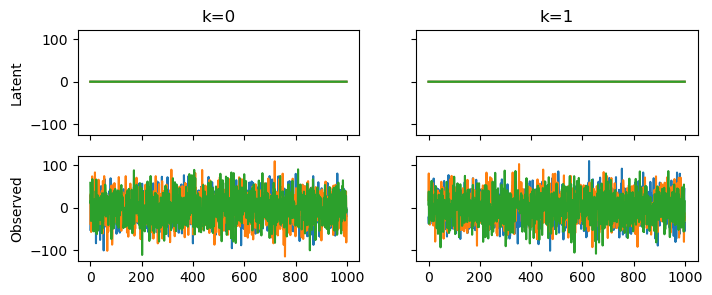

In [19]:
from cohlib.utils import gamma_root
from cohlib.jax.dists import sample_from_gamma
from cohlib.jax.gaussian_obs import add0
from gamma_create import k2_full50_10
# scale = 0.01
# k2_full50_10(scale)
# gamma_name = f'k2-full50-10-{scale}'
gamma_name = 'k2-single-10'
gamma_path = os.path.join(gamma_root(), f"{gamma_name}.pickle")
gamma_load = pickle_open(gamma_path)
gamma_full = gamma_load['gamma']
freqs = gamma_load['freqs']
nz = gamma_load['nonzero_inds']
# tind = gamma_load['target_ind']
scale_nonzero = 500
gamma_full *= scale_nonzero

rk = jr.key(7)
L = 25
zs = sample_from_gamma(rk, gamma_full, L)

zs_0dc = jnp.apply_along_axis(add0, 0, zs)
xs = jnp.fft.irfft(zs_0dc, axis=0)

o1 = 1
o2 = 3 
obs_var = o1 * 10**o2
obs = xs + jr.normal(rk, xs.shape)*jnp.sqrt(obs_var)

fig, ax = plt.subplots(2,2,figsize=(8,3), sharex=True, sharey=True)
a = 15
for l in range(0+a,3+a):
    for k in range(2):
        ax[0,k].plot(xs[:,k,l])
        ax[1,k].plot(obs[:,k,l])
        ax[0,k].set_title(f'k={k}')
        ax[0,0].set_ylabel('Latent')
        ax[1,0].set_ylabel('Observed')

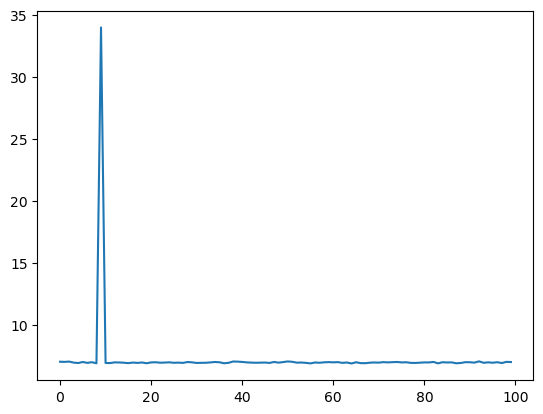

In [65]:
# plt.plot(gamma_full[nz,0,0].real)
plt.plot(10*jnp.log10(gamma_full[nz,0,0].real))

In [48]:
# K = gamma_full.shape[-1]
# Nnz = nz.size
# diag_mask = jnp.stack([jnp.eye(K) for n in range(Nnz)])
# gamma_nonzero = jnp.stack([jnp.eye(K, dtype=complex) for _ in range(Nnz)])
# gamma_nonzero + jr.normal(rk, gamma_nonzero.shape)*diag_mask*0.1

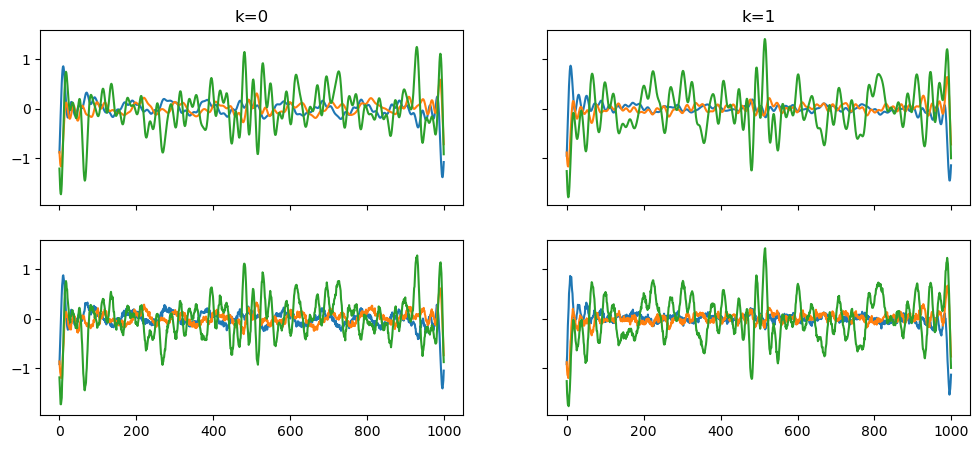

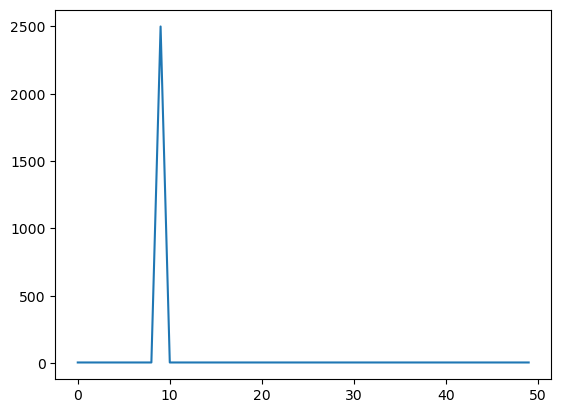

In [14]:
plt.plot(gamma_full[nz,0,0].real)